# NSRDB and SAM for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

**SAM**: System Advisor Model  
Information can be found at https://sam.nrel.gov/  
SDK: https://sam.nrel.gov/sdk. The SDK needs to be downloaded.

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

The [PVWatts v5](https://www.nrel.gov/docs/fy14osti/62641.pdf) model is used to estimate the power output.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import sam
from prereise.gather.solardata.helpers import to_reise

from getpass import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid(['Eastern'])
solar_plant = grid.plant.groupby('type').get_group('solar')

--> Loading Eastern interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,GenFuelCost,GenIOB,GenIOC,GenIOD,type,interconnect,lat,lon,zone_id,zone_name
plant_id,,,,,,,,,,,,,,,,,,,,,
375,2483,2.0,0.0,0.0,0.0,1.04,2.40,1,2.0,0.55,...,0.0,0.0,0.0,0.0,solar,Eastern,44.365213,-73.190075,3,Vermont
376,2483,2.0,0.0,0.0,0.0,1.04,2.40,1,2.0,0.26,...,0.0,0.0,0.0,0.0,solar,Eastern,44.365213,-73.190075,3,Vermont
390,2509,2.0,0.0,0.0,0.0,1.04,2.40,1,2.0,0.22,...,0.0,0.0,0.0,0.0,solar,Eastern,44.093507,-72.607217,3,Vermont
391,2509,1.8,0.0,0.0,0.0,1.04,2.16,1,1.8,0.67,...,0.0,0.0,0.0,0.0,solar,Eastern,44.093507,-72.607217,3,Vermont
403,2524,2.2,0.0,0.0,0.0,1.04,2.64,1,2.2,0.33,...,0.0,0.0,0.0,0.0,solar,Eastern,44.443794,-73.157018,3,Vermont


In [4]:
print("There are %d solar plants in the Eastern interconnection." % len(solar_plant))

There are 612 solar plants in the Eastern interconnection.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key. Set the path to the SAM Simulation Core (SSC) library in `ssc_lib`.

In [5]:
email = getpass(prompt='email=')
key = getpass(prompt='api_key=')
ssc_lib = 'path_to_ssc_library'
data = sam.retrieve_data(solar_plant, email, key, ssc_lib)

email=········
api_key=········
No solar PV plant in LA
No solar PV plant in ME
No solar PV plant in MT
No solar PV plant in ND
No solar PV plant in NH
No solar PV plant in WV


100%|██████████| 288/288 [53:29<00:00,  8.79s/it]  


In [6]:
data.head(n=20)

,Pout,plant_id,ts,ts_id
0,0.0,375,2016-01-01,1
1,0.0,376,2016-01-01,1
2,0.0,390,2016-01-01,1
3,0.0,391,2016-01-01,1
4,0.0,403,2016-01-01,1
5,0.0,404,2016-01-01,1
6,0.0,405,2016-01-01,1
7,0.0,440,2016-01-01,1
8,0.0,441,2016-01-01,1
9,0.0,442,2016-01-01,1


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
id = 375
print("Capacity of the plant: %.1f MW" % solar_plant.loc[id].GenMWMax)

Capacity of the plant: 2.0 MW


In [8]:
data_oneplant = data[data.plant_id == id]

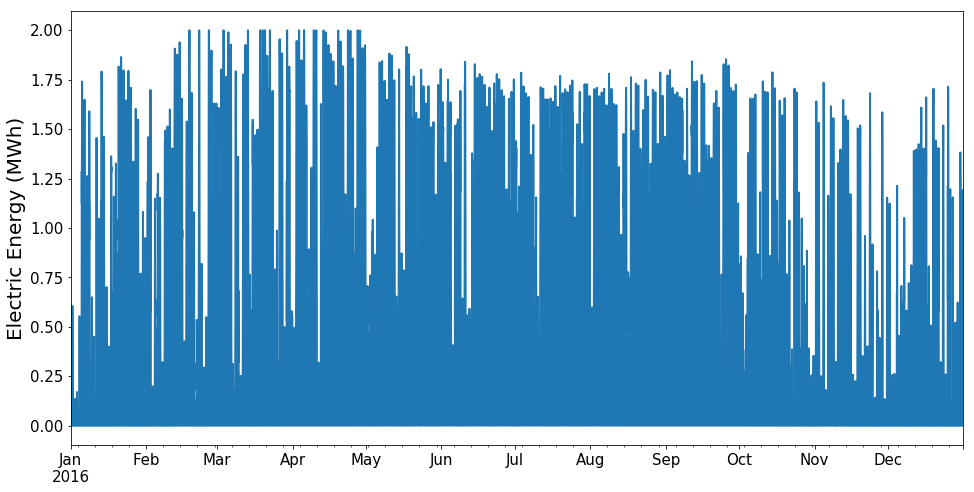

In [9]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

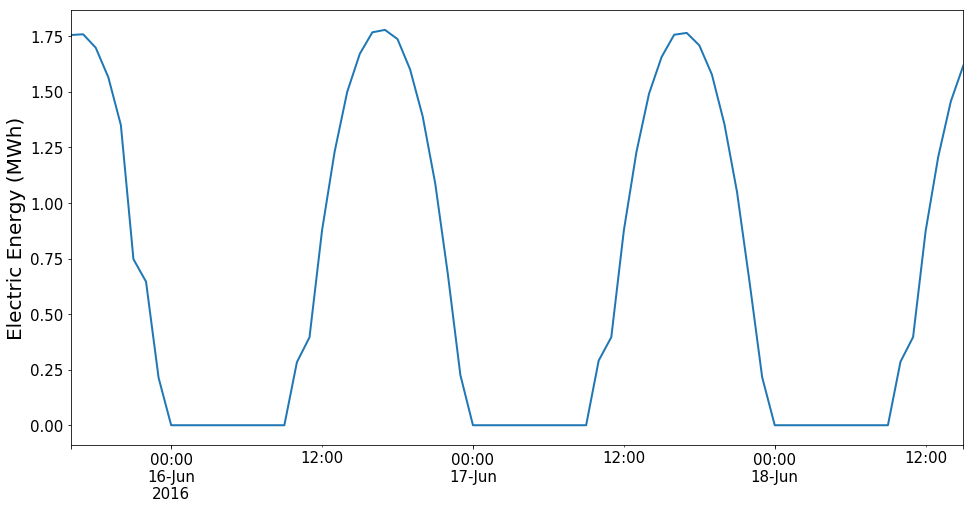

In [10]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

In [11]:
print("Capacity Factor: %.3f" % (data_oneplant['Pout'].sum() / (366 * 24 * solar_plant.loc[id].GenMWMax)))

Capacity Factor: 0.193


## 4. Format Data
Data are formated for REISE

In [12]:
data_reise = to_reise(data)

In [13]:
data_reise.tail()

,375,376,390,391,403,404,405,440,441,442,...,13659,13660,13661,13662,13663,13664,13665,13666,13667,13668
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,0.836541,0.836541,0.569320,0.512388,0.472478,0.472478,0.472478,0.195171,0.205443,0.236259,...,0.863528,12.937136,9.084243,0.820269,0.892250,66.236720,15.019909,0.219378,0.644158,0.122642
2016-12-31 20:00:00,0.364769,0.364769,0.218775,0.196897,0.151604,0.151604,0.151604,0.051381,0.054085,0.062198,...,0.829577,11.331430,7.640695,0.687058,0.691410,54.678175,12.678203,0.157116,0.501288,0.072794
2016-12-31 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.770685,6.741425,3.762728,0.355904,0.348984,23.010973,6.863129,0.067805,0.274978,0.019728
2016-12-31 22:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.647758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12-31 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.315847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
